In [58]:
#########################################################################################################################################################
#                                                                                                                                                       #
#                             EMC2 WP 2 Processing 0.1                                                                                                  #
#                             Department and subset (commune) preparation                                                                               #
#                             BD_TOPO (Building, roads, administrative limits and activity areas),                                                      #
#                             Filosofi (population)                                                                                                     #
#                             Author : Perez Joan                                                                                                       #
#                                                                                                                                                       #
#########################################################################################################################################################

In [94]:
# 0.1 Packages
import os
import pandas
import geopandas
import time
import contextily
import matplotlib.pyplot as plt

In [95]:
## 1. Download & load raw data

# Download : last version of BD_TOPO for a given French department (BD TOPO® décembre 2023 Tous Thèmes par département format GeoPackage projection légale)
# Webpage : https://geoservices.ign.fr/bdtopo#telechargementgpkgreg
# Chosen department : Alpes maritimes (06)
# https://data.geopf.fr/telechargement/download/BDTOPO/BDTOPO_3-3_TOUSTHEMES_GPKG_LAMB93_D006_2023-12-15/BDTOPO_3-3_TOUSTHEMES_GPKG_LAMB93_D006_2023-12-15.7z

# Download : last version of Filosofi (2019)
# https://www.insee.fr/fr/statistiques/7655475?sommaire=7655515

# Set filepaths
BD_TOPO = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\Raw data\\BDTOPO 3-3\\1_DONNEES_LIVRAISON_2023-12-00191\\BDT_3-3_GPKG_LAMB93_D006-ED2023-12-15\\BDT_3-3_GPKG_LAMB93_D006-ED2023-12-15.gpkg"
Filosofi = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\Raw data\\Filosofi 2019\\carreaux_200m_met.shp"

# Read the administrative boundaries
start_time = time.time()
administrative = geopandas.read_file(BD_TOPO, layer="commune", engine='pyogrio', use_arrow=True)
# Read roads
road = geopandas.read_file(BD_TOPO, layer="troncon_de_route", engine='pyogrio', use_arrow=True)
# Read buildings
building = geopandas.read_file(BD_TOPO, layer="batiment", engine='pyogrio', use_arrow=True)
# Read activity areas
activity_area = geopandas.read_file(BD_TOPO, layer="zone_d_activite_ou_d_interet", engine='pyogrio', use_arrow=True)
# Read population
population = geopandas.read_file(Filosofi, engine='pyogrio', use_arrow=True)
end_time = time.time()
processing_time = end_time - start_time
print("Import processing time:", processing_time, "seconds")

Import processing time: 54.54058623313904 seconds


In [96]:
## 2. Subset & clean data

# Keep population squares for given department only
dpt_population = geopandas.sjoin(population, administrative, predicate='within')
dpt_population = dpt_population.iloc[:, list(range(35))]

# Remove variables with wrong format in BD_TOPO datasets (compatibility issues with geopandas
administrative_clean = administrative.iloc[:, list(range(8)) + list(range(12, 19)) + list(range(20, 26))]
building_clean = building.iloc[:, list(range(6)) + list(range(10, 28))]
road_clean = road.iloc[:, list(range(8)) + list(range(12, 44)) + list(range(45, 85))]
activity_area_clean = activity_area.iloc[:, list(range(9)) + list(range(13, 19))]

In [97]:
## 3. Create a subset for a given commune

# Example for commune named Drap
subset = "Drap"
administrative_clean_subset = administrative_clean[administrative_clean["nom_officiel"] == subset]
dpt_population_subset = geopandas.sjoin(dpt_population, administrative_clean_subset[['geometry']], predicate='within')
building_clean_subset = geopandas.sjoin(building_clean, administrative_clean_subset[['geometry']], predicate='within')
road_clean_subset = geopandas.sjoin(road_clean, administrative_clean_subset[['geometry']], predicate='within')

In [98]:
## 4. Create GPKG for downloaded department & subset

# Save main gpkg
# Specify the file path to record the main gpkg file
file_path = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\processing\\0.1\\Output\\EMC2_FR06_WP2_bis.gpkg"
# Save the GeoDataFrames to a gpkg file
dpt_population.to_file(file_path, layer = "population", driver="GPKG")
building_clean.to_file(file_path, layer = "building", driver="GPKG")
road_clean.to_file(file_path, layer = "road", driver="GPKG")
administrative_clean.to_file(file_path, layer = "administrative", driver="GPKG")

# Save subset
# Specify the file path for the subset gpkg file
file_path = "C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\processing\\0.1\\Output\\EMC2_FR06_Drap_WP2_bis.gpkg"
# Save the GeoDataFrames to a GeoPackage file
dpt_population_subset.to_file(file_path, layer = "population", driver="GPKG")
building_clean_subset.to_file(file_path, layer = "building", driver="GPKG")
road_clean_subset.to_file(file_path, layer = "road", driver="GPKG")
administrative_clean_subset.to_file(file_path, layer = "administrative", driver="GPKG")

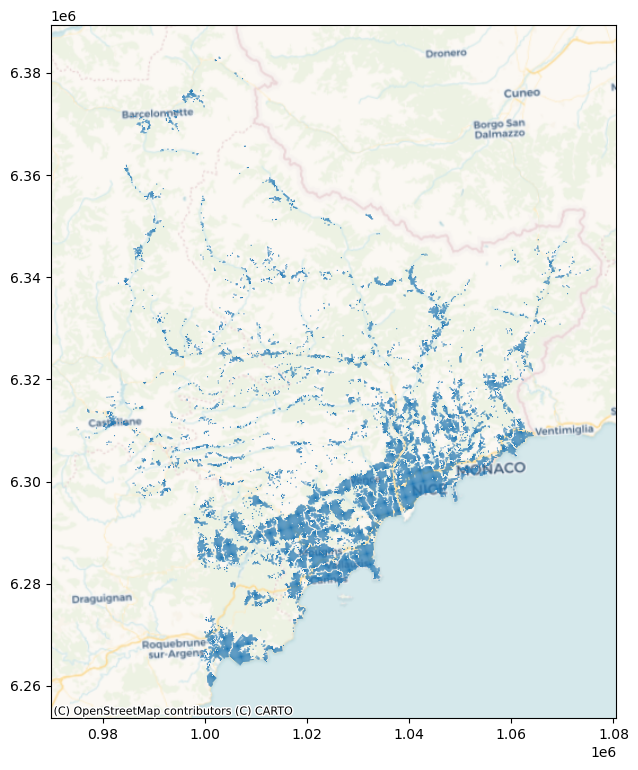

In [103]:
# Appendixes A1 : check : population filter (Filosofi) on given department
# Map
ax = dpt_population.plot(figsize=(9, 9))
# Add basemap
contextily.add_basemap(ax, crs=subset_population.crs, source=contextily.providers.CartoDB.Voyager)

In [92]:
# Appendixes A2 : check column names & indexes before/after removal of columns
before = road # layer name
for index, column_name in enumerate(before.columns):
    print(f"Column {index}: {column_name}")
after = road_clean # layer name
for index, column_name in enumerate(after.columns):
    print(f"Column {index}: {column_name}")

Column 0: cleabs
Column 1: nature
Column 2: nom_collaboratif_gauche
Column 3: nom_collaboratif_droite
Column 4: importance
Column 5: fictif
Column 6: position_par_rapport_au_sol
Column 7: etat_de_l_objet
Column 8: date_creation
Column 9: date_modification
Column 10: date_d_apparition
Column 11: date_de_confirmation
Column 12: sources
Column 13: identifiants_sources
Column 14: methode_d_acquisition_planimetr
Column 15: precision_planimetrique
Column 16: methode_d_acquisition_altimetri
Column 17: precision_altimetrique
Column 18: nombre_de_voies
Column 19: largeur_de_chaussee
Column 20: itineraire_vert
Column 21: prive
Column 22: sens_de_circulation
Column 23: reserve_aux_bus
Column 24: urbain
Column 25: vitesse_moyenne_vl
Column 26: acces_vehicule_leger
Column 27: acces_pieton
Column 28: periode_de_fermeture
Column 29: nature_de_la_restriction
Column 30: restriction_de_hauteur
Column 31: restriction_de_poids_total
Column 32: restriction_de_poids_par_essieu
Column 33: restriction_de_larg

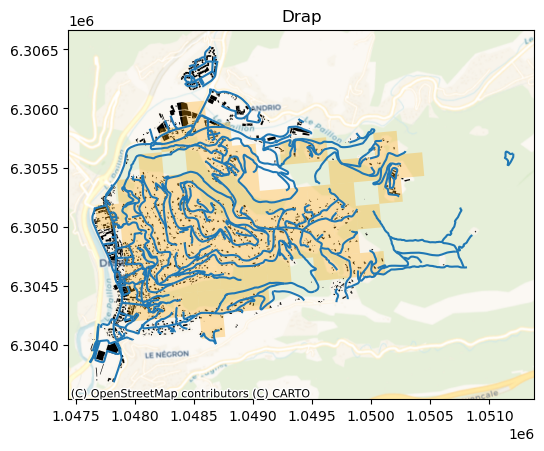

In [100]:
# Appendixes A3 : Map of subset
# Create a plot with building_clean
ax = building_clean_drap.plot(color='black')
# Plot road_clean on the same axis
road_clean_drap.plot(ax=ax)
# Plot population on the same axis
ax = subset_population_drap.plot(ax=ax, alpha=0.3, color='orange')
plt.title(subset)
contextily.add_basemap(ax, crs=subset_population_drap.crs, source=contextily.providers.CartoDB.Voyager)